---
numbering: false
---

# LW2: descent methods for unconstrained optimization problems

{button}`Launch in Colab <https://githubtocolab.com/jflamant/mines-nancy-optimization/blob/main/labs/LW2.ipynb>`
{button}`Download .ipynb file <https://github.com/jflamant/mines-nancy-optimization/blob/main/labs/LW2.ipynb>`

## Part 1: gradient descent methods

In this notebook, we will explore first-order descent methods -- namely **gradient descent** to solve (unconstrained) optimization problems. The goals are:  
- to write your own gradient descent algorithm;
- investigate different step-size strategies (fixed size, optimal, and backtracking)
- compute convergence metrics to monitor the progress of the algorithm -- and deciding when to stop

Just like in LW1, practical implementation of the algorithms relies on classical Python libraries:
1. **NumPy**: For efficient numerical computations, matrix operations, and solving least-squares problems using built-in linear algebra functions.
2. **Matplotlib**: For visualizing the data and displaying / interpreting results.
3. **Scipy**: a NumPy-based python library for scientific computations. In particular, we we'll use some functions from ``scipy.optimize``.

### Running the Notebook
This notebook can be executed in the following environments:
- **Google Colab**: A convenient, cloud-based option that requires no setup. Simply open the notebook in Colab, and you're ready to run the code.
- **Locally**: You can run the notebook on your local machine using environments like **JupyterLab** or **Jupyter Notebook**. You can also run it directly in **Visual Studio Code** if you have the Jupyter extension. In all cases, ensure you have Python installed along with the required libraries, `NumPy` and `Matplotlib` and ``scipy``.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### First example: a quadratic function

Consider the following optimization problem
$$\min_{x \in \mathbb{R}^2} f(x)$$
where
$$f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} - \mathbf{p}^\top \mathbf{x} \text{ with } \begin{cases} \mathbf{Q} = \begin{bmatrix} 1 & 0 \\ 0 & \eta\end{bmatrix}, \: \eta > 0\\
\mathbf{p} = \begin{bmatrix} 1\\1\end{bmatrix}\end{cases}$$

**Preliminary questions**
1. Recall the expression of $\nabla f(\mathbf{x})$.
2. What is a minimizer of this optimization problem? Is it unique?
3. Recall the principle of gradient descent using pseudo-code.

> write here your answers using markdown.

**Programming questions**
1. Create a function that returns the value of the objective function for a given vector $\mathbf{x} = [x_1, x_2]$, for $\eta = 5$.
2. Display the objective function on the grid $[-1, 1] \times [-1, 1]$, with, say 100 points on each axis. (check the functions ``np.meshgrid``, ``plt.pcolormesh``, ``plt.contour``, ``plt.contourf``). Comment the different graphical representations.
3. Gradient descent (*constant step-size*)
   1. write an algorithm that performs constant step-size gradient descent for a fixed number of iterations from a initial point $\mathbf{x}_0$.
   2. display such iterations on top of the cost function.
   3. propose several metrics to assess the progress (or convergence) of the algorithm as the iterations goes. Display them as a function of iterations (using ``plt.semilogy``)
   4. modify your algorithm to stop whenever one of these metrics goes below a prescribed threshold (fixed in advance).
   5. Using numerical experiments, comment on how to choose a constant step size.
4. Gradient descent (*optimal step-size*)
   1. recall the principle of the optimal stepsize strategy.
   2. adapt the previous algorithm to compute the optimal stepsize at each iteration.
   3. display the evolution of performance metrics along iterations.

5. Compare both strategies in terms of convergence speed and comment. How does the parameter $\eta$ influences algorithmic properties?

In [3]:
# question 1

import numpy as np
import matplotlib.pyplot as plt

# 1. Définition du problème (Quadratique)
def f_quad(x, Q, p):
    return 0.5 * x.T @ Q @ x - p.T @ x

def grad_quad(x, Q, p):
    return Q @ x - p

import numpy as np  # Import de la bibliothèque de calcul numérique
import matplotlib.pyplot as plt  # Import de l'outil de visualisation
from scipy.optimize import minimize_scalar # Import nécessaire pour le pas optimal

# --- 1. Définition du problème ---
def f_quad(x, Q, p):
    # Calcule 0.5 * x^T * Q * x - p^T * x (fonction coût)
    return 0.5 * x.T @ Q @ x - p.T @ x

def grad_quad(x, Q, p):
    # Calcule Q * x - p (dérivée de la fonction coût)
    return Q @ x - p

# --- 2. Moteur de Descente de Gradient ---
def gradient_descent(f, grad_f, x0, step_type='constant', alpha=0.1, max_iter=100, tol=1e-6, Q=None):
    x = x0.copy()  # On copie le point de départ pour ne pas modifier l'original
    history = [x.copy()]  # Liste pour stocker tous les points visités (pour le tracé)
    grad_norms = []  # Liste pour stocker la "force" du gradient à chaque étape

    for i in range(max_iter):  # Boucle principale (nombre maximum d'itérations)
        g = grad_f(x)  # Calcul du vecteur gradient au point actuel
        g_norm = np.linalg.norm(g)  # Calcul de la norme (longueur) du gradient
        grad_norms.append(g_norm)  # On enregistre cette norme pour suivre la convergence

        if g_norm < tol:  # Si le gradient est presque nul, on a trouvé le minimum
            break  # On arrête l'algorithme

        if step_type == 'optimal':  # Si on a choisi la recherche du meilleur pas
            phi = lambda a: f(x - a * g)  # On crée une fonction qui dépend seulement du pas 'a'
            res = minimize_scalar(phi, bounds=(0, 10), method='bounded')  # On cherche le 'a' qui minimise f
            alpha_k = res.x  # On récupère la valeur du pas optimal trouvé
        else:
            alpha_k = alpha  # Sinon, on utilise le pas fixe donné en entrée

        x = x - alpha_k * g  # Mise à jour du point : on avance dans le sens opposé au gradient
        history.append(x.copy())  # On ajoute le nouveau point à l'historique

    return x, np.array(history), np.array(grad_norms)  # On retourne le résultat et les suivis

# --- 3. Fonction de Visualisation ---
def plot_optimization_results(f, history, grad_norms, title="Convergence"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Création d'une figure à deux panneaux

    x1 = np.linspace(-1, 2, 100)  # Création de 100 points sur l'axe X
    x2 = np.linspace(-1, 2, 100)  # Création de 100 points sur l'axe Y
    X1, X2 = np.meshgrid(x1, x2)  # Création d'une grille 2D avec ces points

    Z = np.zeros_like(X1)  # Préparation d'une matrice vide pour les valeurs de la fonction
    for i in range(len(x1)):  # Parcours des lignes de la grille
        for j in range(len(x2)):  # Parcours des colonnes de la grille
            Z[i,j] = f(np.array([X1[i,j], X2[i,j]]))  # Calcul de l'altitude (Z) pour chaque point (X, Y)

    cp = ax1.contour(X1, X2, Z, levels=30)  # Dessin des lignes de niveau (courbes de contour)
    ax1.plot(history[:, 0], history[:, 1], 'ro-', markersize=3, label="Trajectoire")  # Dessin du chemin parcouru
    ax1.set_title(f"Trajectoire : {title}")  # Ajout du titre au premier graphique
    ax1.legend()  # Affichage de la légende

    ax2.semilogy(grad_norms, 'b-o', markersize=4)  # Dessin de la courbe de convergence (échelle log sur Y)
    ax2.set_title("Évolution de ||grad f||")  # Titre du second graphique
    ax2.set_xlabel("Itérations")  # Nom de l'axe des abscisses
    ax2.grid(True)  # Affichage d'une grille de lecture

    plt.show()  # Affichage final des deux graphiques

Terminé en 100 itérations (Pas constant)
Terminé en 16 itérations (Pas optimal)


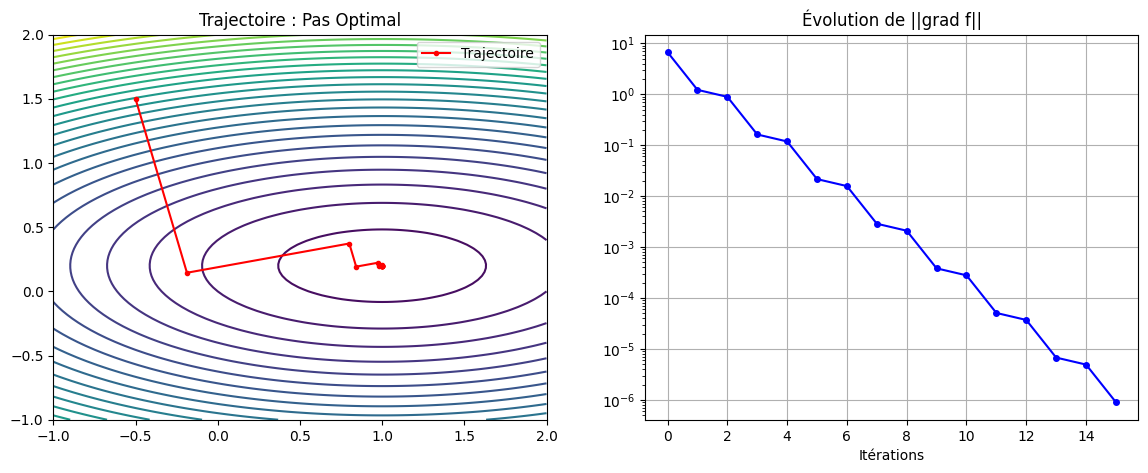

In [6]:
from scipy.optimize import minimize_scalar  # Import de l'outil pour chercher le meilleur pas alpha

# --- 1. Paramètres spécifiques à l'exercice ---
eta = 5  # Paramètre d'étirement de la fonction (conditionnement)
Q = np.array([[1, 0], [0, eta]])  # Matrice de la forme quadratique (courbure)
p = np.array([1, 1])  # Vecteur linéaire (déplace le minimum)
x0 = np.array([-0.5, 1.5])  # Point de départ choisi pour l'algorithme

# --- 2. Préparation des fonctions de test ---
# On utilise 'lambda' pour créer des fonctions qui n'ont besoin que de 'x' en entrée
f_test = lambda x: f_quad(x, Q, p)  # La fonction f(x) utilisant nos paramètres Q et p
grad_test = lambda x: grad_quad(x, Q, p)  # Le gradient grad_f(x) utilisant nos paramètres Q et p

# --- 3. Exécution de la méthode à Pas Constant ---
# On récupère seulement l'historique et les gradients (on ignore la solution finale '_' )
_, hist_c, grads_c = gradient_descent(f_test, grad_test, x0,
                                      step_type='constant', alpha=0.1)

# --- 4. Exécution de la méthode à Pas Optimal ---
# Ici, l'algorithme va chercher le meilleur 'alpha' à chaque pas de temps
_, hist_o, grads_o = gradient_descent(f_test, grad_test, x0,
                                      step_type='optimal')

# --- 5. Affichage des statistiques en console ---
print(f"Terminé en {len(grads_c)} itérations (Pas constant)")  # Affiche le nombre d'étapes pour le pas fixe
print(f"Terminé en {len(grads_o)} itérations (Pas optimal)")   # Affiche le nombre d'étapes pour le pas calculé

# --- 6. Visualisation des résultats ---
# On utilise la fonction de tracé définie plus haut pour voir la trajectoire 'optimale'
plot_optimization_results(f_test, hist_o, grads_o, title="Pas Optimal")

In [ ]:
# question 3

In [ ]:
# question 4

In [ ]:
# question 5

### Second example: a non-quadratic function
Example from Boyd and Vanderberghe.

Consider the optimization problem
$$ \min_{x_1, x_2} f(x_1, x_2)$$
where
$$f(x_1, x_2)= e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$$

In this example, we'll implement the backtracking method seen in class.

**Preliminary questions**
1. Compute the expression of $\nabla f(\mathbf{x})$.
2. Is the problem convex? Comment the existence and uniqueness of solutions to this optimization problem.



> write here your answers using markdown.

**Programming questions**
1. Create a function that returns the value of the objective function for a given vector $\mathbf{x} = [x_1, x_2]$.
2. Display the objective function on the grid $[-2, 0.5] \times [-0.5, 0.5]$, with, say 100 points on each axis.
3. Gradient descent (*constant step-size* and *optimal step size*)
   1. Following the quadratic example, write a gradient stepsize algorithm for this problem.
   2. Write a second algorithm with optimal step size selection at each iteration. Do not try to compute the optimal step analytically; rather, look at the function ``scipy.optimize.minimize_scalar`` to compute the step numerically.

4. Gradient descent (*backtracking*)
   1. Recall the principle of backtracking using pseudocode.
   2. For the first gradient descent iteration, implement the backtracking procedure seen in class for arbitrary parameters $(s, \eta)$.
   3. How does the amount of backtracks varies as parameters $(s, \eta)$ are changed?
   4. Incorporate the backtracking strategy in the gradient descent algorithm. Add a counter that tracks the number of backtracks in the algorithm and monitor this information.
5. Compare all three approaches trough selected graphical plots.

In [10]:
# --- Méthode de Descente de Gradient (avec Backtracking / Armijo) ---
def gradient_descent_backtracking(f, grad_f, x0, s=1.0, beta=0.5, eta=0.1, max_iter=100, tol=1e-6):
    x = x0.astype(float)  # Convertit le point de départ en nombres décimaux pour la précision
    history = [x.copy()]  # Initialise l'historique avec le point de départ
    grad_norms = []       # Prépare la liste pour stocker l'évolution de la norme du gradient

    for i in range(max_iter):  # Début de la boucle itérative d'optimisation
        g = grad_f(x)          # Calcule le vecteur gradient au point courant
        gnorm = np.linalg.norm(g)  # Calcule la "taille" (norme) du gradient
        grad_norms.append(gnorm)   # Enregistre la norme pour le suivi de la convergence

        if gnorm < tol:        # Teste si le gradient est assez petit (proche du minimum)
            break              # Si oui, on arrête l'algorithme car on a convergé

        # --- Procédure de Backtracking (Recherche linéaire) ---
        alpha = s              # On commence avec le pas initial maximal 's'
        # Condition d'Armijo : on vérifie si la descente est suffisante
        # Si f(x - alpha*g) est trop grand, on réduit le pas alpha
        while f(x - alpha * g) > f(x) - eta * alpha * gnorm**2:
            alpha *= beta      # On multiplie alpha par beta (ex: 0.5) pour le réduire

        # --- Mise à jour du point ---
        x = x - alpha * g      # On effectue le pas de descente avec le alpha validé
        history.append(x.copy())  # On ajoute la nouvelle position à l'historique

    return np.array(history), np.array(grad_norms)  # Retourne les résultats sous forme de tableaux NumPy

In [9]:
# --- Méthode de Newton (Optimisation du Second Ordre) ---
def newton_method(f, grad_f, hess_f, x0, max_iter=50, tol=1e-8):
    x = x0.astype(float)  # Convertit le point initial en nombres décimaux (flottants)
    history = [x.copy()]  # Liste pour stocker tous les points (utile pour tracer la trajectoire)
    grad_norms = []       # Liste pour stocker la norme du gradient (utile pour voir la convergence)

    for i in range(max_iter):  # Boucle principale (Newton converge souvent en moins de 10 itérations)
        g = grad_f(x)          # Calcule le vecteur gradient (pente locale)
        H = hess_f(x)          # Calcule la matrice Hessienne (courbure locale / dérivées secondes)

        gnorm = np.linalg.norm(g)  # Calcule la "taille" du gradient
        grad_norms.append(gnorm)   # Enregistre la norme pour le graphique de convergence

        if gnorm < tol:        # Si le gradient est quasiment nul, on est au minimum
            break              # On sort de la boucle

        # --- Calcul du pas de Newton ---
        # On résout le système H * step = -g pour trouver la direction et la taille du pas.
        # C'est beaucoup plus précis et rapide que de faire x = x - alpha * g.
        step = np.linalg.solve(H, -g)

        # --- Mise à jour ---
        x = x + step           # On déplace le point actuel vers le minimum estimé
        history.append(x.copy())  # On enregistre la nouvelle position

    return np.array(history), np.array(grad_norms)  # On retourne l'historique et les normes

In [8]:
# --- Méthode BFGS (Algorithme de Quasi-Newton) ---
def bfgs_method(f, grad_f, x0, B0=None, max_iter=50, tol=1e-8):
    x = x0.astype(float)      # On convertit le point de départ en flottants
    N = len(x)                # On récupère le nombre de dimensions (ici 2)
    # On initialise la matrice B (approximation de la Hessienne) par l'identité si rien n'est fourni
    B = np.eye(N) if B0 is None else B0
    history = [x.copy()]      # On prépare le stockage du chemin parcouru
    grad_norms = []           # On prépare le stockage des normes du gradient

    for i in range(max_iter): # Début de la boucle itérative
        g = grad_f(x)          # Calcul du gradient au point actuel
        gnorm = np.linalg.norm(g) # Calcul de la taille du gradient
        grad_norms.append(gnorm)  # Sauvegarde pour le graphique de convergence

        if gnorm < tol:        # Test d'arrêt si on est assez proche du minimum
            break

        # --- Recherche de la direction ---
        # On résout B * d = -g pour trouver la direction de descente 'd'
        d = np.linalg.solve(B, -g)

        # --- Recherche du pas optimal (Line Search) ---
        # On cherche le meilleur alpha pour minimiser f dans la direction d
        res = minimize_scalar(lambda a: f(x + a * d), bounds=(0, 10), method='bounded')

        # --- Calcul des variations ---
        s = res.x * d          # s = variation de la position (x_next - x)
        x_next = x + s         # On calcule le nouveau point
        y = grad_f(x_next) - g # y = variation du gradient entre les deux points

        # --- Mise à jour de la matrice B (Formule BFGS) ---
        # On met à jour l'approximation de la Hessienne B en utilisant s et y
        # C'est cette formule magique qui permet d'apprendre la courbure du terrain
        B = B + np.outer(y, y)/np.dot(y, s) - (B @ np.outer(s, s) @ B)/(s.T @ B @ s)

        x = x_next             # Le nouveau point devient le point actuel
        history.append(x.copy()) # On l'ajoute à l'historique pour le tracé

    return np.array(history), np.array(grad_norms) # On retourne les résultats

In [7]:
# Question 4
# Fonction de Boyd
def f_boyd(x):
    return np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)

# Gradient de Boyd
def grad_boyd(x):
    g1 = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) - np.exp(-x[0] - 0.1)
    g2 = 3*np.exp(x[0] + 3*x[1] - 0.1) - 3*np.exp(x[0] - 3*x[1] - 0.1)
    return np.array([g1, g2])

# Hessienne de Boyd
def hess_boyd(x):
    h11 = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)
    h12 = 3*np.exp(x[0] + 3*x[1] - 0.1) - 3*np.exp(x[0] - 3*x[1] - 0.1)
    h22 = 9*np.exp(x[0] + 3*x[1] - 0.1) + 9*np.exp(x[0] - 3*x[1] - 0.1)
    return np.array([[h11, h12], [h12, h22]])


In [ ]:
# Question 5


## Part 2: second-order descent methods

Consider again the second optimization problem, i.e.,

$$ \min_{x_1, x_2} f(x_1, x_2)$$
where
$$f(x_1, x_2)= e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$$

**Preliminary questions**
1. compute the Hessian of $f$
2. using pseudo-code, recall the principle of Newton methods and quasi-Newton methods.


> write here your answers using markdown.

**Programming questions**
1. Implement Newton's method for this problem.
2. Implement the BFGS algorithm for this problem. For the first iteration, use $B_0 = \nabla^2 f(x^{(0)})$ to initialize the method.
3. Compare gradient descent, Newton's algorithm and BFGS through numerical experiments. Evaluate convergence speed, numerical complexity and timings.

Affichage Newton...


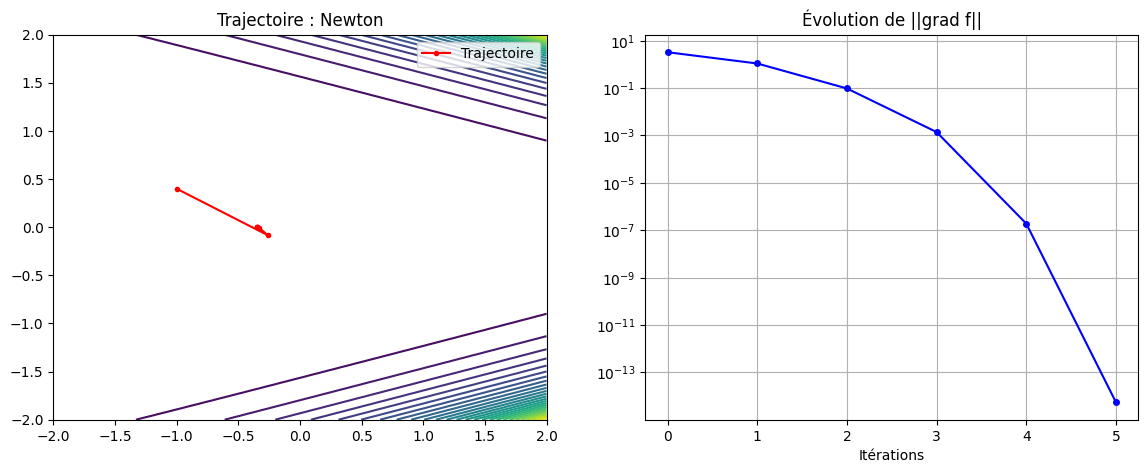

Affichage BFGS...


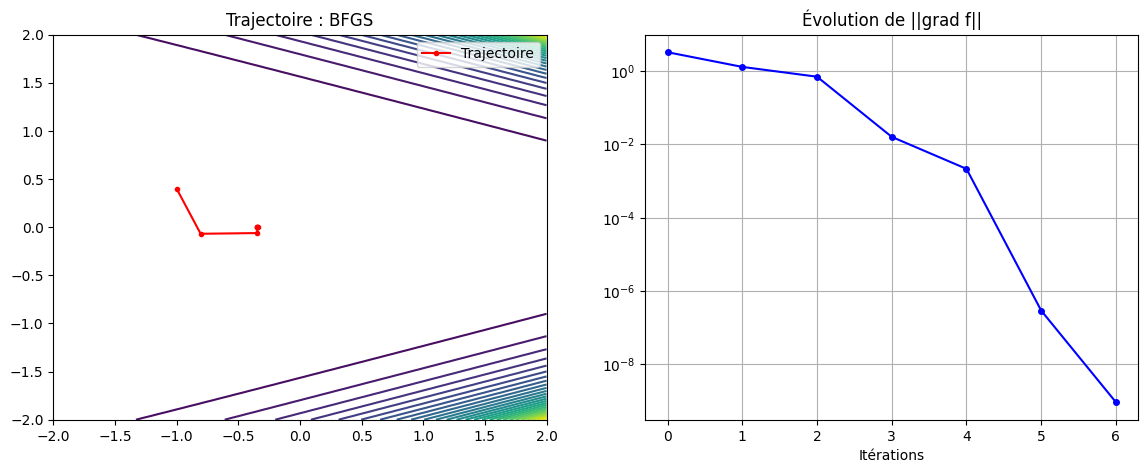

Affichage Backtracking...


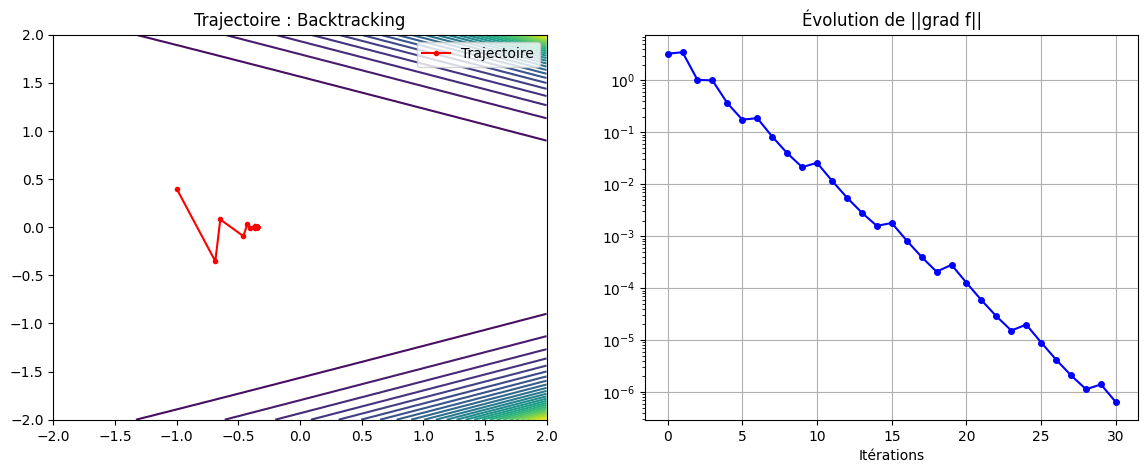

In [11]:
# --- 1. CONFIGURATION DU TEST ---

# On définit le point de départ (x1 = -1.0, x2 = 0.4)
x_start = np.array([-1.0, 0.4])

# Exécution de la méthode Gradient avec Backtracking
h_bt, g_bt = gradient_descent_backtracking(f_boyd, grad_boyd, x_start)

# Exécution de la méthode de Newton (utilise la Hessienne pour une convergence ultra-rapide)
h_nt, g_nt = newton_method(f_boyd, grad_boyd, hess_boyd, x_start)

# Exécution de la méthode BFGS (Quasi-Newton : estime la Hessienne sans la calculer)
h_bf, g_bf = bfgs_method(f_boyd, grad_boyd, x_start)


# --- 2. FONCTION DE TRACÉ DÉDIÉE À LA FONCTION DE BOYD ---

def plot_boyd(history, grad_norms, title):
    # On crée une figure avec deux graphiques côte à côte
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # On définit la grille de visualisation demandée : entre -2 et 2 sur chaque axe
    x1_range = np.linspace(-2, 2, 100)
    x2_range = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)

    # On calcule la valeur de la fonction de Boyd pour chaque point de la grille
    Z = np.zeros_like(X1)
    for i in range(len(x1_range)):
        for j in range(len(x2_range)):
            Z[i,j] = f_boyd(np.array([X1[i,j], X2[i,j]]))

    # Graphique 1 : Les lignes de niveau (contours) et le chemin parcouru
    cp = ax1.contour(X1, X2, Z, levels=30) # Dessine 30 lignes de niveau
    ax1.plot(history[:, 0], history[:, 1], 'ro-', markersize=3, label="Trajectoire") # Trace les points visités
    ax1.set_title(f"Trajectoire : {title}")
    ax1.legend()

    # Graphique 2 : La vitesse de convergence
    # On utilise une échelle logarithmique pour mieux voir la chute du gradient vers 0
    ax2.semilogy(grad_norms, 'b-o', markersize=4)
    ax2.set_title("Évolution de ||grad f||")
    ax2.set_xlabel("Itérations")
    ax2.grid(True)
    plt.show()

# --- 3. LANCEMENT DE L'AFFICHAGE ---

# Affiche les résultats pour Newton (généralement très peu d'itérations)
print("Affichage Newton...")
plot_boyd(h_nt, g_nt, "Newton")

# Affiche les résultats pour BFGS (convergence rapide sans Hessienne)
print("Affichage BFGS...")
plot_boyd(h_bf, g_bf, "BFGS")

# Affiche les résultats pour le Gradient Backtracking (plus robuste mais plus lent)
print("Affichage Backtracking...")
plot_boyd(h_bt, g_bt, "Backtracking")

In [ ]:
# Question 2
# Fonction à minimiser : f(x,y) = (x-2)^2 + (y-1)^2
def f_simple(x):
    return (x[0] - 2)**2 + (x[1] - 1)**2

# Gradient de la fonction
def grad_simple(x):
    return np.array([2*(x[0] - 2), 2*(x[1] - 1)])

# Fonction de projection spécifique (les contraintes)
def my_projection(p):
    x, y = p[0], p[1]
    # Contrainte 1 : y >= x^2
    if y < x**2:
        y = x**2
    # Contrainte 2 : x + y <= 2
    if x + y > 2:
        shift = (x + y - 2) / 2
        x -= shift
        y -= shift
    return np.array([x, y])

In [17]:
# Question 3

import numpy as np
import matplotlib.pyplot as plt

def conjugate_gradient(Q, p, x0, tol=1e-10, max_iter=None):
    """
    Algorithme du Gradient Conjugué Linéaire.
    Résout Qx = p (équivalent à minimiser 0.5*x.T*Q*x - p.T*x)
    """
    x = x0.astype(float)
    N = len(p)
    if max_iter is None:
        max_iter = N  # Théoriquement, converge en N itérations

    # Initialisation
    r = Q @ x - p       # Le résidu (r0)
    d = -r              # La direction initiale (d0)

    history = [x.copy()]
    r_norms = [np.linalg.norm(r)]

    for k in range(max_iter):
        if r_norms[-1] < tol:
            break

        # Calcul du pas optimal alpha_k
        # alpha_k = ||rk||^2 / (dk.T * Q * dk)
        alpha = (r.T @ r) / (d.T @ Q @ d)

        # Mise à jour de la solution
        x = x + alpha * d

        # Calcul du nouveau résidu
        r_next = r + alpha * (Q @ d)

        # Calcul de beta_k+1 (Formule de Fletcher-Reeves)
        # beta_k+1 = ||rk+1||^2 / ||rk||^2
        beta = (r_next.T @ r_next) / (r.T @ r)

        # Mise à jour de la direction conjuguée
        d = -r_next + beta * d

        # Stockage et préparation de l'étape suivante
        r = r_next
        history.append(x.copy())
        r_norms.append(np.linalg.norm(r))

    return np.array(history), np.array(r_norms)
Q=np.array(([1,1,1],[2,3,4],[43,23,12]))
p=np.array([1,2,3])

Qspd = Q.T @ Q
pspd = Q.T @ p

history2, r_norms2 = conjugate_gradient(Qspd, pspd, x0, tol=1e-12, max_iter=50)
x_cg2 = history2[-1]
x_exact = np.linalg.solve(Q, p)

print("x_CG (normal eq) =", x_cg2)
print("x_exact          =", x_exact)
print("||Qx_CG2 - p||    =", np.linalg.norm(Q @ x_cg2 - p))

x_CG (normal eq) = [-3.44444444  8.88888889 -4.44444444]
x_exact          = [-3.44444444  8.88888889 -4.44444444]
||Qx_CG2 - p||    = 5.49536968517069e-12


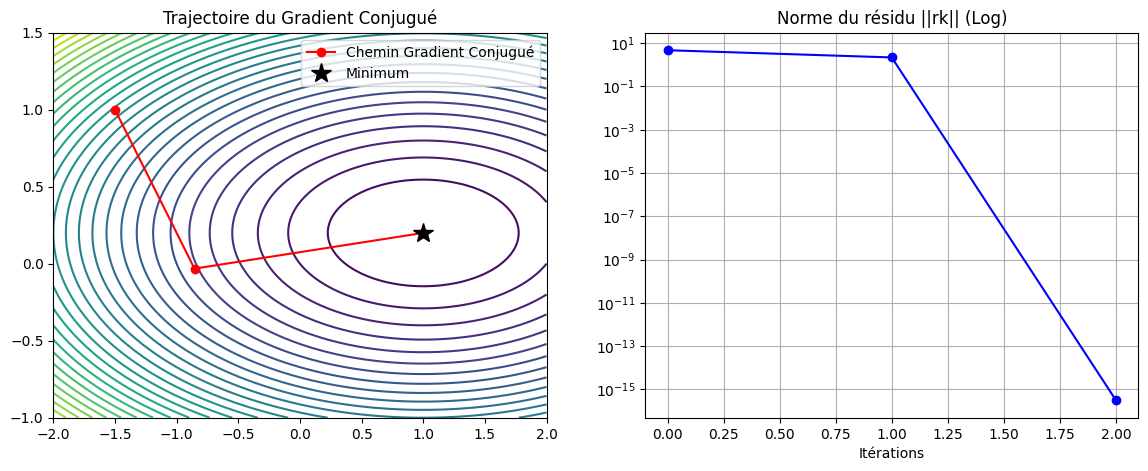

In [13]:
# --- PARAMÈTRES DU TEST ---
eta = 5
Q = np.array([[1.0, 0.0], [0.0, eta]])
p = np.array([1.0, 1.0])
x_start = np.array([-1.5, 1.0])

# --- EXÉCUTION ---
hist_cg, norms_cg = conjugate_gradient(Q, p, x_start)

# --- FONCTION DE TRACÉ (SIMPLE ET CLAIRE) ---
def plot_cg_results(Q, p, history, norms):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # 1. Trajectoire sur les contours
    x_range = np.linspace(-2, 2, 100)
    y_range = np.linspace(-1, 1.5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    # Fonction f(x) = 0.5 * x.T * Q * x - p.T * x
    Z = 0.5 * (Q[0,0]*X**2 + Q[1,1]*Y**2) - (p[0]*X + p[1]*Y)

    ax1.contour(X, Y, Z, levels=30, cmap='viridis')
    ax1.plot(history[:, 0], history[:, 1], 'ro-', label="Chemin Gradient Conjugué")
    ax1.plot(1.0, 1.0/Q[1,1], 'k*', markersize=15, label="Minimum")
    ax1.set_title("Trajectoire du Gradient Conjugué")
    ax1.legend()

    # 2. Convergence du résidu
    ax2.semilogy(norms, 'b-o')
    ax2.set_title("Norme du résidu ||rk|| (Log)")
    ax2.set_xlabel("Itérations")
    ax2.grid(True)

    plt.show()

# Affichage
plot_cg_results(Q, p, hist_cg, norms_cg)